## Problem :

The customer churn refers to customer leaving/abondaning service. But retaining the customers is important for a company to wrok in long term.

The objective of this project is to build a deep-learning binary classification model using Artificial Neural-Networks(ANN) . To predict weather a customer will churn.

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data set

data = pd.read_csv("D:/Customer-Churn-ANN/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.DataFrame(data)


## Basic EDA

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [12]:
df.shape

(7043, 21)

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Convert total charges to integer

In [20]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### identify any missing values 

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Visualize and understand the data 

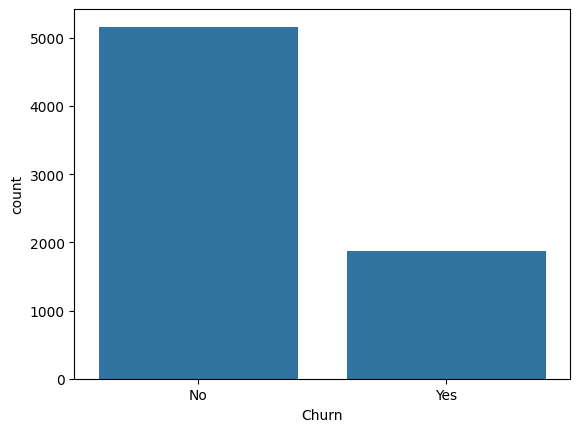

In [22]:
sns.countplot(x='Churn', data=df)
plt.show()

### Function to analyze categorical columns


In [36]:
def plot_categorical_count(column):
    plt.figure(figsize=(8,4))
    sns.countplot(x=column, hue='Churn', data=df)
    plt.xticks(rotation=45)
    plt.title(f"{column} vs Churn")
    plt.show()


In [37]:
def plot_churn_rate(column):
    churn_rate = (
        df.groupby(column)['Churn']
          .value_counts(normalize=True)
          .unstack()
    )

    churn_rate['Yes'].plot(kind='bar', figsize=(8,4))
    plt.ylabel("Churn Rate")
    plt.title(f"Churn Rate by {column}")
    plt.xticks(rotation=45)
    plt.show()


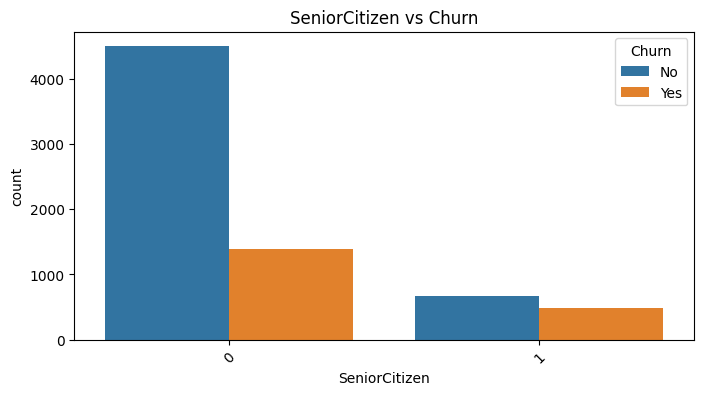

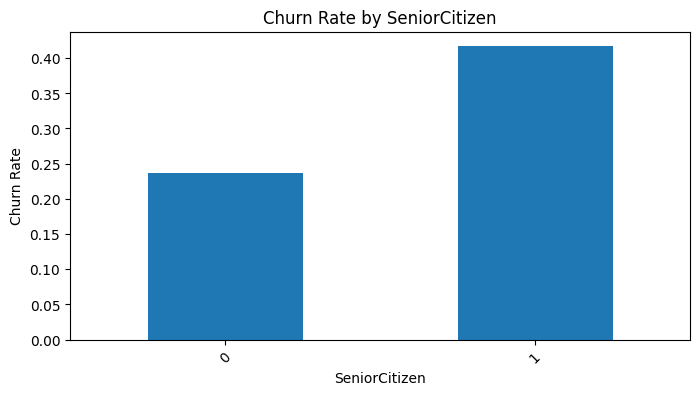

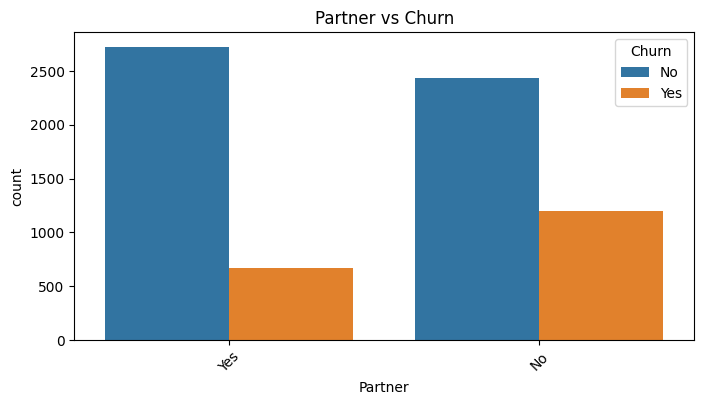

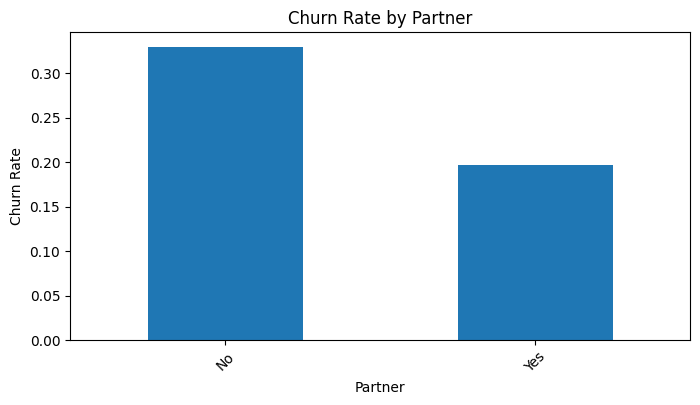

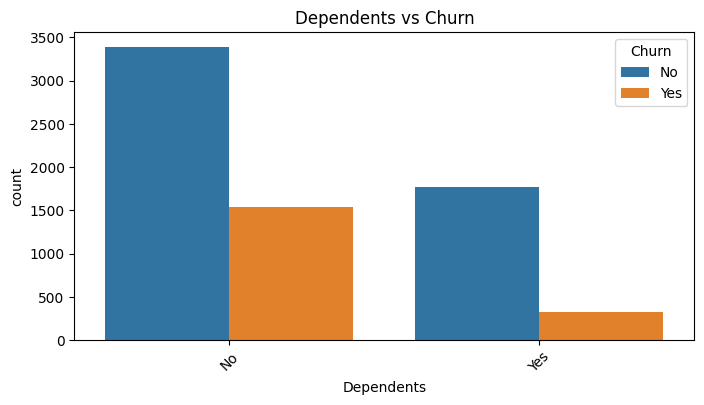

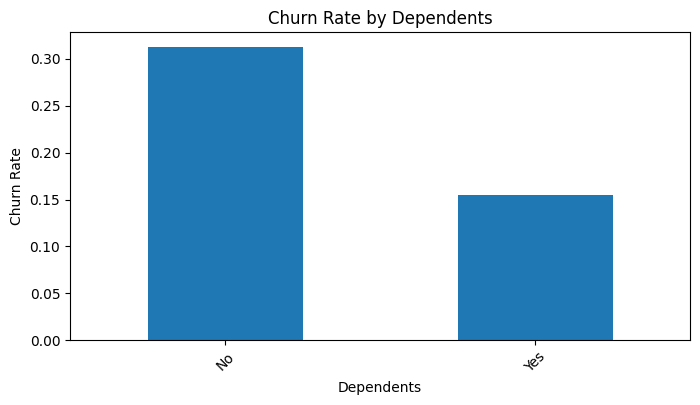

In [43]:
# Binary categorical
plot_categorical_count('SeniorCitizen')
plot_churn_rate('SeniorCitizen')
plot_categorical_count('Partner')
plot_churn_rate('Partner')
plot_categorical_count('Dependents')
plot_churn_rate('Dependents')

###  From senior citizen vs churn we can conclude that normal citizen are more likely to churn but this can be also said beacuse we have more normal citizens.But overall doesn't corelate that much.
### From partners we can say people with no partner are more likely to churn than with partner. good correlation.
### From dependents we can say people who are dependents are more likely to not churn as compared to independent.

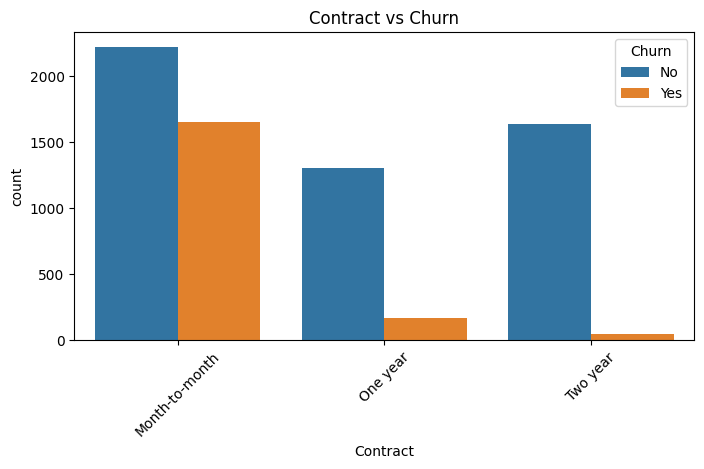

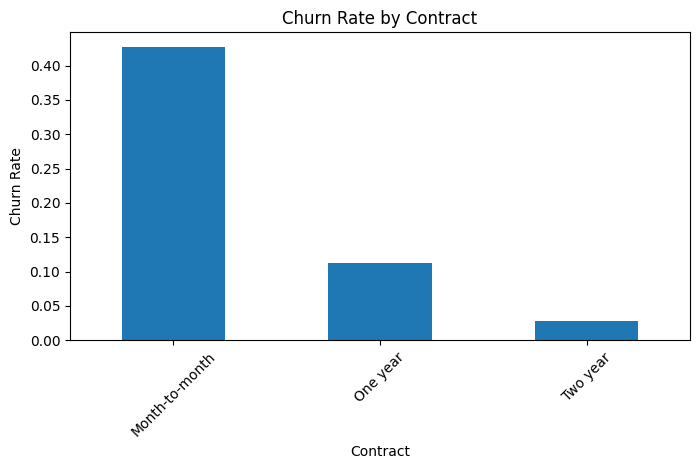

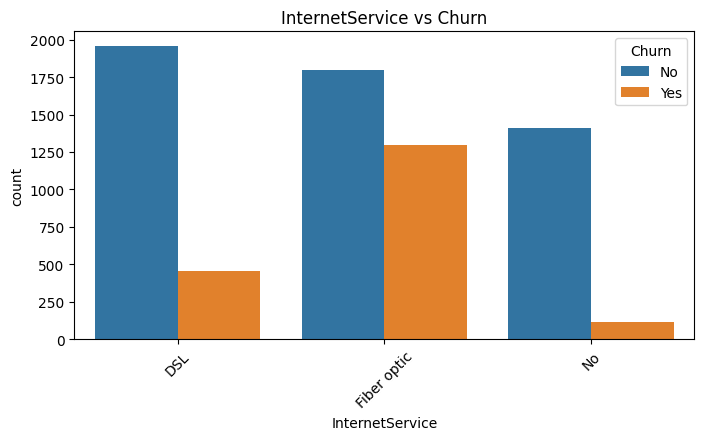

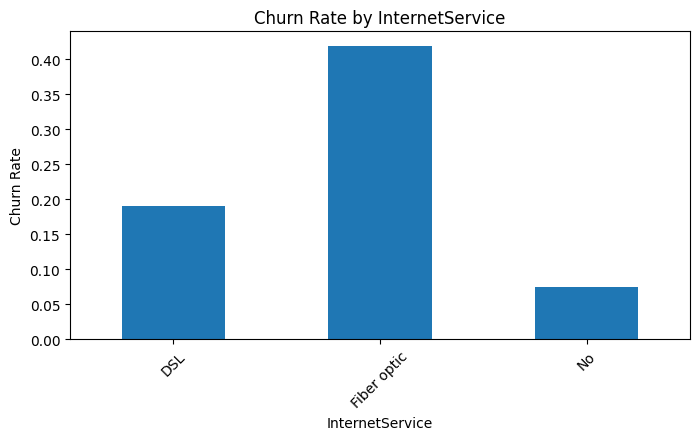

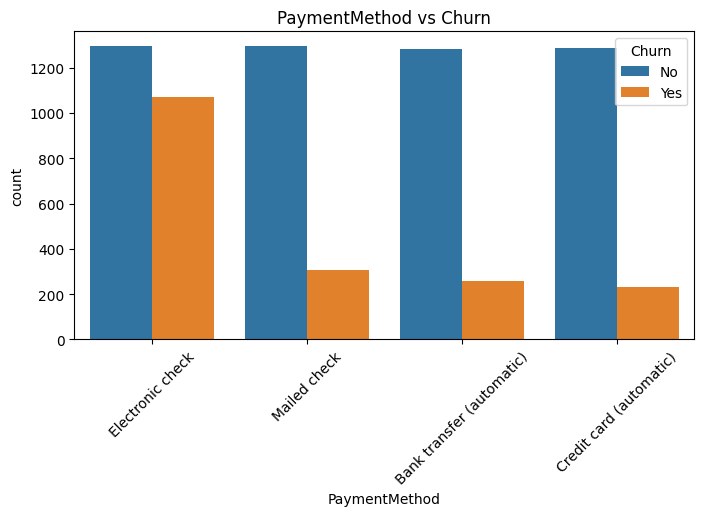

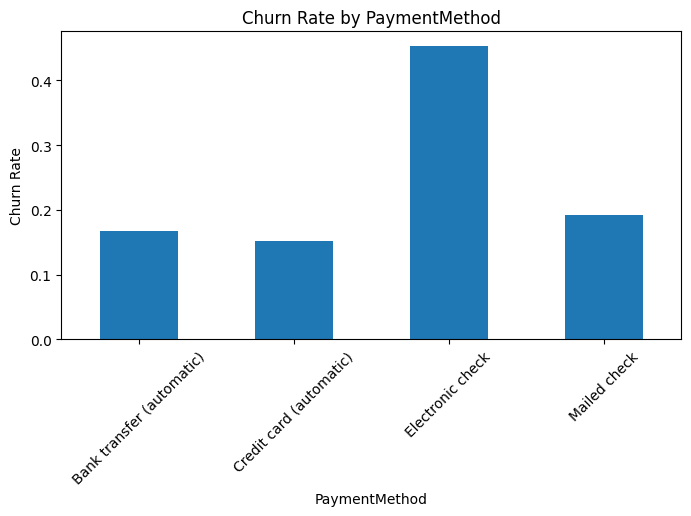

In [40]:
# Multi-category categorical
plot_categorical_count('Contract')
plot_churn_rate('Contract')

plot_categorical_count('InternetService')
plot_churn_rate('InternetService')

plot_categorical_count('PaymentMethod')
plot_churn_rate('PaymentMethod')

### From contract we can conclude that customers with longer contract tend to have lower churn rate as compared to month - month , hence we can say customers who subscribe monthly are more likely to churn.

### From internet service we can conclude that people with no internet service are less likely to churn , and customers with fiber optics are more likely to churn.

### From payment method we can conclude customers who pay using electronic check are more likely churn mostly because its easier to unsuc=bsicribe that others.

### Convert tenure to nnumeric

In [44]:
df['tenure'] = df['tenure'].astype(float)

## Distribution of Numeric Features

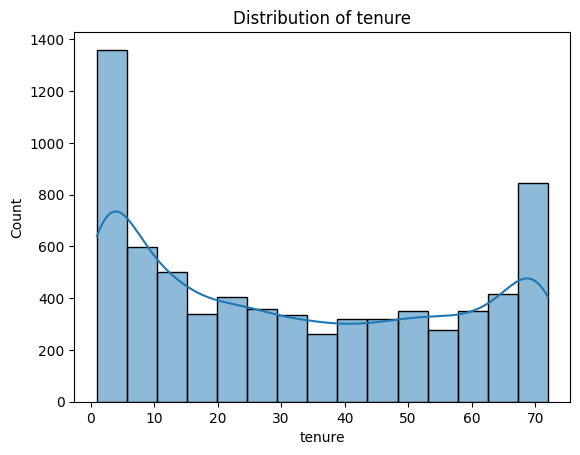

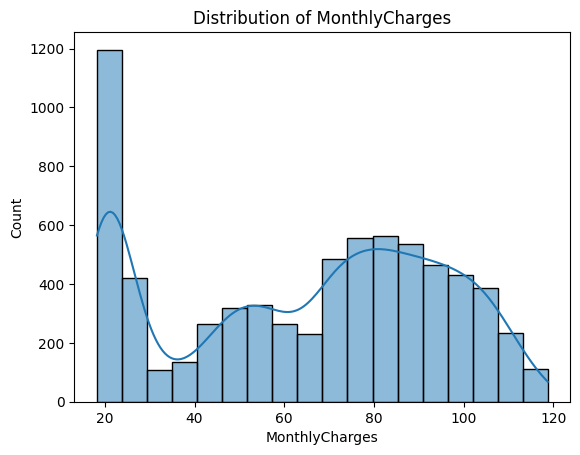

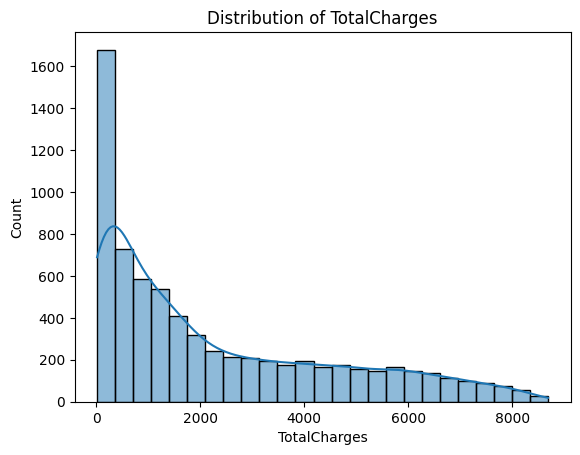

In [46]:
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_col:
    sns.histplot(df[col], kde = True , )
    plt.title(f"Distribution of {col}")
    plt.show()

### From Distribution we ccan conclude that customers tenure is uniformly distributed and little bit right skewed which suggest more customers are new and recently connected.
### From distribution of monthly charges more customers have monthly charges normally distributed which suggest , which suggest monthly payments are coming from all different ranges.
### From Total charges distribution we say that more people less total charges suggesting most people are recently joined.

## Numeric Feature vs Churn

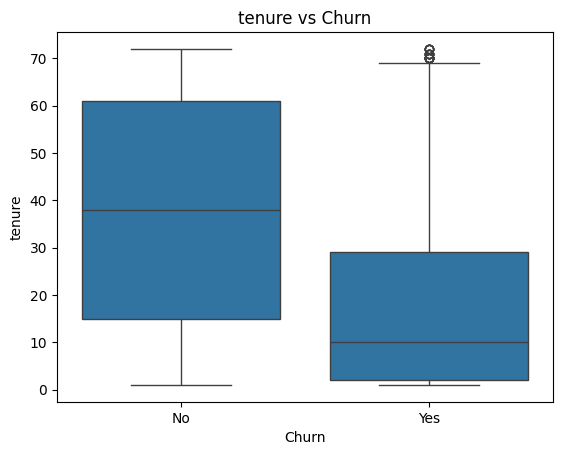

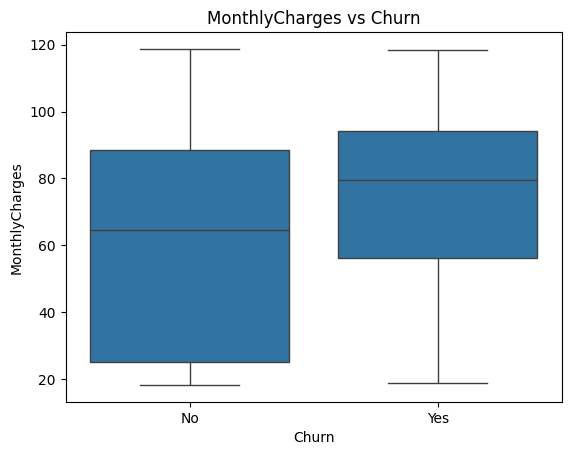

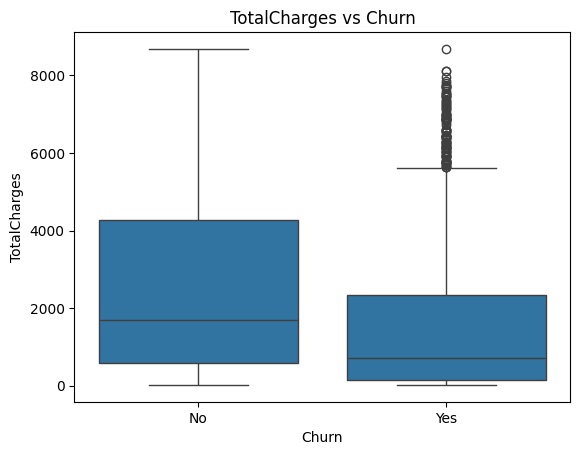

In [48]:
for col in num_col:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

### From box plot of tenure vs churn which indicates customers who have stayed with us for less time are more likely to churn.
### From monthly charges vs churn we say customers who have higher monthly charges are more likely to churn
### From Total charges vs chrn we can say people who have less total charges are more likely to churn however there are many outliers suggesting imbalance. 

## Correlation Analysis (Numeric Only)

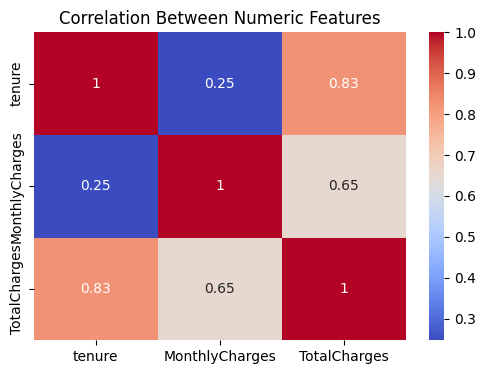

In [50]:
corr = df[num_col].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


### From Correlation between tenure , monthly charges , total charges suggests that more the tenure more the total charges cuggesting strong correlation , and less correlation with monthly charges 